<center><br> <center><strong style="font-size: 30px;"> Data-Driven Decisions: Transforming HR with Predictive Analytics </strong></center>
</center> <br> <center><b style="font-size: 20px;">Prepared By - Subhasish Sinha</b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Instaling & Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Processing**](#Section6)<br>
  - **5.1** [**Data Pre-Profiling**](#Section51)<br>
  - **5.2** [**Data Cleaning**](#Section52)<br>
  - **5.3** [**Data Post-Profiling**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
**8.** [**Modelling Development & Evaluation**](#Section8)<br>

**9.** [**Conclusion**](#section9)


---
<a name = Section1></a>
# **1. Introduction**
---


In the dynamic world of human resources, the ability to predict and pre-emptively address potential challenges stands as a cornerstone of organizational success. "Data-Driven Decisions: Transforming HR with Predictive Analytics" embodies our commitment to harnessing the power of data to revolutionize human resources management. This report encapsulates our journey through the meticulous application of data science techniques to enhance employee retention strategies within a leading software company.

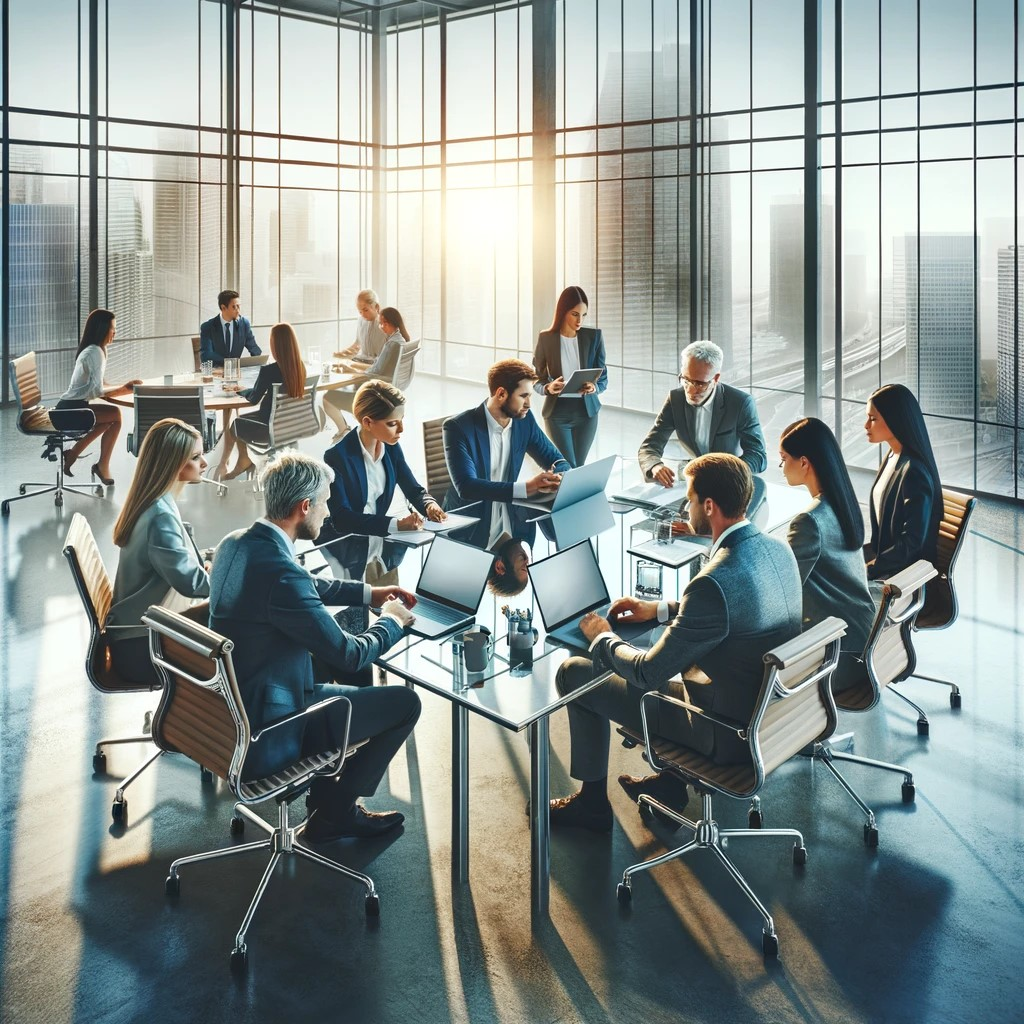

**The Evolution of HR through Data**

Traditionally, human resources have relied on qualitative insights and retrospective analyses to understand employee behavior and turnover. However, with the advent of big data and advanced analytics, HR departments now have the unprecedented capability to anticipate trends and act before issues escalate. By integrating predictive analytics into HR practices, organizations can not only improve retention rates but also foster a more engaged and satisfied workforce.

**Objective of the Report**

The primary objective of this report is to detail the processes and outcomes of implementing a predictive analytics project aimed at identifying factors contributing to employee turnover and developing models to predict potential departures. This project serves as a prototype for transforming reactive HR measures into proactive strategies that not only retain talent but also enhance overall organizational resilience.

**Scope of the Report**

This report provides a comprehensive overview of the project from inception to completion, including:

> A clear articulation of the problem statement that delineates the challenges faced by the HR department.
Detailed descriptions of the data acquisition and preprocessing steps to ensure clarity and reproducibility of the analysis.

> Insightful exploratory data analysis that unveils underlying patterns and relationships within the data.

> Rigorous model development and evaluation processes that demonstrate the effectiveness of predictive modeling in making informed HR decisions.

---
<a name = Section2></a>
# **2. Problem Statement**
---


### **Identifying the Challenge** ###

Our client, the HR Department of a leading software company, has been grappling with the challenge of employee turnover. This issue is not only costly in terms of recruitment and training expenses but also impacts team morale and overall productivity. The traditional method employed by the HR department involves conducting exit interviews to gather insights from departing employees. While these interviews provide valuable information, they are inherently reactive and vary significantly in their usefulness based on the interviewer's skill and the forthrightness of the employee.

### **Limitations of Current Practices** ###

The primary drawbacks of relying solely on exit interviews for insights into employee turnover include:

Reactivity: The strategy is fundamentally reactive, as it only allows HR to gather insights after an employee has decided to leave.
Variable Insight Quality: The quality and depth of insights depend heavily on the interviewer’s skills and the employee's willingness to share candid feedback, which can lead to inconsistent and sometimes unreliable data.
Lack of Scalability and Aggregation: Insights from exit interviews are difficult to aggregate and analyze systematically, making it challenging to identify broader trends or to implement strategic changes based on individual cases.
Time Lag in Implementation: By the time feedback is analyzed and any strategic changes are implemented, the employees who could have benefited from those changes may have already left, rendering the efforts ineffective for retention.
The Need for a Proactive Approach

Recognizing these limitations, the HR department is eager to adopt a more proactive approach by utilizing predictive analytics. The goal is to leverage historical employee data to predict potential resignations before they occur. By identifying at-risk employees early, HR can implement targeted interventions designed to address the specific concerns and conditions that contribute to employee dissatisfaction and turnover.

### **Project Goals** ###

The objectives of this predictive analytics project are to:

Develop a model that can accurately predict employee turnover based on various factors such as job satisfaction, workload, performance evaluations, and personal demographics.
Provide HR with a tool that enables them to intervene proactively with at-risk employees, thereby enhancing retention strategies and reducing turnover rates.
Shift the HR paradigm from a reactive to a proactive stance, utilizing data-driven insights to foster a more engaged and stable workforce.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

In [130]:
!pip install pandas
!pip install mysql-connector-python
!pip install -q --upgrade ydata-profiling

In [131]:
import mysql.connector as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from ydata_profiling import ProfileReport
import seaborn as sns
%matplotlib inline
import scipy as sp
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


## **4.1 Data Description** ##

This project utilizes three key datasets provided by the Business Intelligence Analysts at the software company, each crucial for understanding different facets of employee dynamics:

> Department Data (department_data): Contains information about the various departments within the company, including the unique department code (dept_id), the department name (dept_name), and the head of each department (dept_head). This dataset helps contextualize employee roles within specific departments.

> Employee Details Data (employee_details_data): Comprises personal details about the employees, such as their unique ID (employee_id), age (age), gender (gender), and marital status (marital_status). This information is essential for analyzing demographic factors that may influence employee retention.

> Employee Data (employee_data): Encompasses critical information related to employee performance and employment status, including department affiliation (department), salary level (salary), tenure at the company (tenure), number of projects (n_projects), average monthly hours (avg_monthly_hrs), satisfaction levels (satisfaction), the most recent evaluation (last_evaluation), and whether the employee has filed any complaints (filed_complaint). 

**The target variable status indicates whether an employee is currently employed or has left the company.**

In [132]:
# Database connection parameters
db_config = {
    'host': 'cpanel.insaid.co',
    'user': 'student',
    'passwd': 'student',
    'database': 'Capstone2'
}

In [133]:
# Establishing a database connection
db_connection = sql.connect(**db_config)

In [134]:
# Query to Show all table in the current database
query = "SHOW TABLES;"

In [135]:
# Execute the query and fetch the results
cursor = db_connection.cursor()
cursor.execute(query)
table_names = cursor.fetchall()

In [136]:
# Print the list of table names
for (table_name,) in table_names:
    print(table_name)

department_data
employee_data
employee_details_data
model_evaluation_results
model_evaluation_table


In [137]:
# Query to select all data from Department Data
query_data = "SELECT * FROM department_data"

In [138]:
# Read data into a Pandas DataFrame
df_dept_data = pd.read_sql(query_data, db_connection)

In [139]:
df_dept_data

dept_id    dept_name              dept_head
0    D00-IT           IT             Henry Adey
1    D00-SS        Sales        Edward J Bayley
2    D00-TP         Temp        Micheal Zachrey
3   D00-ENG  Engineering  Sushant Raghunathan K
4    D00-SP      Support         Amelia Westray
5    D00-FN      Finance              Aanchal J
6    D00-PR  Procurement            Louie Viles
7    D00-AD        Admin          Evelyn Tolson
8    D00-MN   Management          Ellie Trafton
9    D00-MT    Marketing           Reuben Swann
10   D00-PD      Product          Darcy Staines

In [140]:
# Query to select all data from Employee Data
query_data_1 = "SELECT * FROM employee_data"

In [141]:
# Read data into a Pandas DataFrame
df_emp_data = pd.read_sql(query_data_1, db_connection)

In [142]:
df_emp_data

avg_monthly_hrs department  filed_complaint  last_evaluation  \
0                246.0       None              NaN         0.866838   
1                134.0       None              NaN         0.555718   
2                156.0     D00-SS              1.0         0.474082   
3                256.0     D00-SP              NaN         0.961360   
4                146.0     D00-SS              NaN         0.507349   
...                ...        ...              ...              ...   
14145            245.0     D00-SS              NaN         0.850785   
14146            192.0     D00-SS              NaN         0.951901   
14147            175.0     D00-MN              NaN         0.854538   
14148            268.0     D00-MT              NaN         0.900887   
14149            268.0     D00-IT              1.0         0.897098   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  \
0               6                NaN  medium      0.134415      Left     4.0   
1               2                NaN     low      0.511041      Left     3.0   
2               2                NaN  medium      0.405101      Left     3.0   
3               6                NaN     low      0.152974      Left     4.0   
4               2                NaN  medium      0.434845      Left     3.0   
...           ...                ...     ...           ...       ...     ...   
14145           6                NaN  medium      0.225084  Employed     5.0   
14146           3                NaN  medium      0.539834  Employed     3.0   
14147           4                NaN  medium      0.934465  Employed     3.0   
14148           5                NaN  medium      0.906613      Left     5.0   
14149           2                NaN     low      0.459371  Employed     4.0   

       employee_id  
0           124467  
1           112210  
2           126150  
3           125346  
4           113707  
...            ...  
14145       101809  
14146       116153  
14147       119780  
14148       115325  
14149       112312  

[14150 rows x 11 columns]

In [143]:
# Query to select all data from Employee Details Data
query_data_2 = "SELECT * FROM employee_details_data"

In [144]:
# Read data into a Pandas DataFrame
df_emp_details = pd.read_sql(query_data_2, db_connection)

In [145]:
df_emp_details

employee_id  age  gender marital_status
0           113558   43    Male        Married
1           112256   24  Female      Unmarried
2           112586   22  Female      Unmarried
3           108071   36    Male        Married
4           116915   38    Male        Married
...            ...  ...     ...            ...
14240       111781   26    Male      Unmarried
14241       100372   35    Male        Married
14242       128083   30  Female        Married
14243       118487   24    Male      Unmarried
14244       118849   39    Male        Married

[14245 rows x 4 columns]

In [146]:
# Closing the database connection
db_connection.close()

## **4.2 Data Information** ##

Upon loading the datasets into our environment, we undertake an initial examination to verify their structure, completeness, and cleanliness:

Verification of Data Integrity: Checks are performed to ensure there are no critical discrepancies in the data, such as mismatched department codes or employee IDs that do not align across datasets.

Preliminary Statistical Summary: Basic statistical analyses, including mean, median, mode, and standard deviations for numerical data, provide an initial understanding of the distribution and central tendencies of the data.

Missing Values: An initial assessment to identify any significant gaps in the datasets, particularly in key variables that could affect the analysis, such as satisfaction, last_evaluation, and tenure.

Data Types Confirmation: Ensuring that each column in the datasets is of the correct data type (e.g., numerical data should not be encoded as strings) for accurate analysis and modeling.

In [147]:
# Displaying the first few rows of each dataframe to inspect data
print("Department Data Preview:")
print(df_dept_data.head(10))

print("\nEmployee Details Data Preview:")
print(df_emp_details.head(10))

print("\nEmployee Data Preview:")
print(df_emp_data.head(10))

Department Data Preview:
   dept_id    dept_name              dept_head
0   D00-IT           IT             Henry Adey
1   D00-SS        Sales        Edward J Bayley
2   D00-TP         Temp        Micheal Zachrey
3  D00-ENG  Engineering  Sushant Raghunathan K
4   D00-SP      Support         Amelia Westray
5   D00-FN      Finance              Aanchal J
6   D00-PR  Procurement            Louie Viles
7   D00-AD        Admin          Evelyn Tolson
8   D00-MN   Management          Ellie Trafton
9   D00-MT    Marketing           Reuben Swann

Employee Details Data Preview:
   employee_id  age  gender marital_status
0       113558   43    Male        Married
1       112256   24  Female      Unmarried
2       112586   22  Female      Unmarried
3       108071   36    Male        Married
4       116915   38    Male        Married
5       104555   22    Male      Unmarried
6       104706   51    Male        Married
7       118536   54    Male        Married
8       111712   43    Male        Marr

In [148]:
# Display basic information about each DataFrame
print("\nDepartment Data Information:")
df_dept_data.info()


Department Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [149]:
print("\nEmployee Details Data Information:")
df_emp_details.info()


Employee Details Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [150]:
print("\nEmployee Data Information:")
df_emp_data.info()


Employee Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [151]:
# Basic Statistical Summary of Numerical Fields in the Employee Data and Details
print("\nStatistical Summary of Employee Data:")
print(df_emp_data.describe().T)


Statistical Summary of Employee Data:
                     count           mean          std        min  \
avg_monthly_hrs    14150.0     199.994346    50.833697  49.000000   
filed_complaint     2046.0       1.000000     0.000000   1.000000   
last_evaluation    12663.0       0.718399     0.173108   0.316175   
n_projects         14150.0       3.778304     1.250162   1.000000   
recently_promoted    297.0       1.000000     0.000000   1.000000   
satisfaction       14000.0       0.621212     0.250482   0.040058   
tenure             14000.0       3.499357     1.462584   2.000000   
employee_id        14150.0  112080.750247  8748.202856   0.000000   

                             25%            50%            75%       max  
avg_monthly_hrs       155.000000     199.000000     245.000000     310.0  
filed_complaint         1.000000       1.000000       1.000000       1.0  
last_evaluation         0.563711       0.724731       0.871409       1.0  
n_projects              3.000000       

In [152]:
print("\nStatistical Summary of Employee Details:")
print(df_emp_details.describe().T)


Statistical Summary of Employee Details:
               count           mean          std       min       25%  \
employee_id  14245.0  112123.050544  8500.457343  100101.0  105775.0   
age          14245.0      32.889926     9.970834      22.0      24.0   

                  50%       75%       max  
employee_id  111298.0  116658.0  148988.0  
age              29.0      41.0      57.0  


<a name = Section51></a>

---
# **5. Data Pre-Processing**
---

## **5.1 Data Pre-Profiling** ##

Based on the initial statistical summary, we observed the following:

*Employee Data:*
1. avg_monthly_hrs: Average monthly hours range widely from 49 to 310, which might indicate variations in part-time and full-time roles or discrepancies that need further investigation.
2. filed_complaint and recently_promoted: Both features are binary, significantly imbalanced, as seen in their counts (2046 for complaints and 297 for promotions out of over 14,000 entries), suggesting most employees neither filed complaints nor were promoted recently.
3. last_evaluation, n_projects, satisfaction, and tenure: These features show a broad range of values and will be crucial for predictive modeling.

*Employee Details Data:*
1. age: The age of employees ranges from 22 to 57 years, with a mean age of approximately 33 years, indicating a relatively young workforce.

## **5.2 Data Cleaning** ##

This section outlines the specific cleaning tasks that will be executed to address issues identified during the data pre-profiling stage.

**Handling Missing Values**

Missing values can significantly impact the performance of a model. Here’s how we address missing data in critical fields:


In [153]:
# Numerical Data: For columns such as last_evaluation, satisfaction, and tenure, 
# missing values is imputed using the median, which is robust against outliers:#

for column in ['last_evaluation', 'satisfaction', 'tenure']:
    df_emp_data[column].fillna(df_emp_data[column].median(), inplace=True)

df_emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    14150 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14150 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14150 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [154]:
# Categorical Data: Ensuring that all categorical data, such as department identifiers and employment statuses, are complete and consistent across datasets:

categorical_cols = ['department', 'status']
for col in categorical_cols:
    df_emp_data[col].fillna('Unknown', inplace=True)

df_emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         14150 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    14150 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14150 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14150 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


**Handling Duplicate Entries**

- **Full Duplicates**:
  We check for and remove any rows in the Employee Data that are exact duplicates across all columns.

- **Partial Duplicates**:
  In the Employee Details Data, duplicates are checked based on the `employee_id` to ensure each employee's data is unique.


In [155]:
# Checking for full duplicates across all columns in Employee Data
print("Checking full duplicates in Employee Data:")
duplicate_rows_emp = df_emp_data.duplicated()
print(f"Number of duplicate entries: {duplicate_rows_emp.sum()}")

# Removing these duplicates, keeping the first occurrence
if duplicate_rows_emp.sum() > 0:
    df_emp_data = df_emp_data.drop_duplicates()
    print("Duplicates removed, keeping the first occurrence.")
else:
    print("No full duplicates found.")

# Checking for duplicates based on 'employee_id' in Employee Details Data
print("\nChecking duplicates based on 'employee_id' in Employee Details Data:")
duplicate_rows_emp_details = df_emp_details.duplicated(subset=['employee_id'])
print(f"Number of duplicate entries based on employee_id: {duplicate_rows_emp_details.sum()}")

# Remove these duplicates, keeping the last occurrence
if duplicate_rows_emp_details.sum() > 0:
    df_emp_details = df_emp_details.drop_duplicates(subset=['employee_id'], keep='last')
    print("Duplicates removed, keeping the last occurrence.")
else:
    print("No duplicates based on employee_id found.")

Checking full duplicates in Employee Data:
Number of duplicate entries: 29
Duplicates removed, keeping the first occurrence.

Checking duplicates based on 'employee_id' in Employee Details Data:
Number of duplicate entries based on employee_id: 0
No duplicates based on employee_id found.


In [156]:
# Outliers
# Outliers can distort statistical measures and models, especially for variables like avg_monthly_hrs:

#Identifying and Handling Outliers with IQR:

Q1 = df_emp_data['avg_monthly_hrs'].quantile(0.25)
Q3 = df_emp_data['avg_monthly_hrs'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_emp_data = df_emp_data[(df_emp_data['avg_monthly_hrs'] >= lower_bound) & (df_emp_data['avg_monthly_hrs'] <= upper_bound)]

Q1, Q3, IQR 

(155.0, 245.0, 90.0)

In [157]:
# Data Consistency: Consistency across data sets is vital for accurate analysis:

# Eensuring consistent department names across datasets
df_emp_data['department'] = df_emp_data['department'].str.lower().str.strip()
df_dept_data['dept_id'] = df_dept_data['dept_id'].str.lower().str.strip()
df_dept_data, df_emp_data

(    dept_id    dept_name              dept_head
 0    d00-it           IT             Henry Adey
 1    d00-ss        Sales        Edward J Bayley
 2    d00-tp         Temp        Micheal Zachrey
 3   d00-eng  Engineering  Sushant Raghunathan K
 4    d00-sp      Support         Amelia Westray
 5    d00-fn      Finance              Aanchal J
 6    d00-pr  Procurement            Louie Viles
 7    d00-ad        Admin          Evelyn Tolson
 8    d00-mn   Management          Ellie Trafton
 9    d00-mt    Marketing           Reuben Swann
 10   d00-pd      Product          Darcy Staines,
        avg_monthly_hrs department  filed_complaint  last_evaluation  \
 0                246.0    unknown              NaN         0.866838   
 1                134.0    unknown              NaN         0.555718   
 2                156.0     d00-ss              1.0         0.474082   
 3                256.0     d00-sp              NaN         0.961360   
 4                146.0     d00-ss              NaN

In [158]:
# Merging Dataframes
df_ndf = pd.merge(df_emp_details, df_emp_data, how="inner", on=['employee_id'])
df_ndf.head()

employee_id  age  gender marital_status  avg_monthly_hrs department  \
0       113558   43    Male        Married            111.0     d00-pr   
1       112256   24  Female      Unmarried            201.0     d00-mn   
2       112586   22  Female      Unmarried            239.0     d00-ss   
3       108071   36    Male        Married            151.0     d00-pr   
4       116915   38    Male        Married            259.0        -it   

   filed_complaint  last_evaluation  n_projects  recently_promoted  salary  \
0              NaN         0.753977           5                1.0  medium   
1              NaN         0.964453           3                NaN  medium   
2              NaN         0.756458           3                NaN     low   
3              NaN         0.608282           5                NaN  medium   
4              NaN         0.749206           4                NaN  medium   

   satisfaction    status  tenure  
0      0.921208  Employed     4.0  
1      0.568479  Employed     3.0  
2      0.144812  Employed     6.0  
3      0.210300  Employed     6.0  
4      0.888514  Employed     3.0

In [159]:
df_ndf.shape, df_ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14116 entries, 0 to 14115
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        14116 non-null  int64  
 1   age                14116 non-null  int64  
 2   gender             14116 non-null  object 
 3   marital_status     14116 non-null  object 
 4   avg_monthly_hrs    14116 non-null  float64
 5   department         14116 non-null  object 
 6   filed_complaint    2041 non-null   float64
 7   last_evaluation    14116 non-null  float64
 8   n_projects         14116 non-null  int64  
 9   recently_promoted  297 non-null    float64
 10  salary             14116 non-null  object 
 11  satisfaction       14116 non-null  float64
 12  status             14116 non-null  object 
 13  tenure             14116 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 1.5+ MB


((14116, 14), None)

In [160]:
# Filling missing values for 'filed_complaint' and 'recently_promoted'
df_ndf['filed_complaint'].fillna(0, inplace=True)
df_ndf['recently_promoted'].fillna(0, inplace=True)
df_ndf

employee_id  age  gender marital_status  avg_monthly_hrs department  \
0           113558   43    Male        Married            111.0     d00-pr   
1           112256   24  Female      Unmarried            201.0     d00-mn   
2           112586   22  Female      Unmarried            239.0     d00-ss   
3           108071   36    Male        Married            151.0     d00-pr   
4           116915   38    Male        Married            259.0        -it   
...            ...  ...     ...            ...              ...        ...   
14111       111781   26    Male      Unmarried            146.0    d00-eng   
14112       100372   35    Male        Married            176.0     d00-ss   
14113       128083   30  Female        Married            300.0     d00-mn   
14114       118487   24    Male      Unmarried            156.0     d00-it   
14115       118849   39    Male        Married            286.0     d00-pd   

       filed_complaint  last_evaluation  n_projects  recently_promoted  \
0                  0.0         0.753977           5                1.0   
1                  0.0         0.964453           3                0.0   
2                  0.0         0.756458           3                0.0   
3                  0.0         0.608282           5                0.0   
4                  0.0         0.749206           4                0.0   
...                ...              ...         ...                ...   
14111              0.0         0.956930           4                0.0   
14112              0.0         0.724731           4                0.0   
14113              0.0         0.972057           7                0.0   
14114              0.0         0.527786           2                0.0   
14115              0.0         0.937997           6                0.0   

       salary  satisfaction    status  tenure  
0      medium      0.921208  Employed     4.0  
1      medium      0.568479  Employed     3.0  
2         low      0.144812  Employed     6.0  
3      medium      0.210300  Employed     6.0  
4      medium      0.888514  Employed     3.0  
...       ...           ...       ...     ...  
14111     low      0.660197  Employed    10.0  
14112  medium      0.529100  Employed     3.0  
14113  medium      0.127920      Left     4.0  
14114  medium      0.457555      Left     3.0  
14115  medium      0.632831  Employed     4.0  

[14116 rows x 14 columns]

In [161]:
df_ndf['department'].value_counts()

department
d00-ss     3895
d00-eng    2573
d00-sp     2108
d00-it     1152
d00-pd      853
d00-mt      812
d00-fn      722
unknown     706
d00-mn      590
-it         207
d00-ad      175
d00-pr      173
d00-tp      150
Name: count, dtype: int64

**Observations from Department Data**
> Inconsistent Naming:
The presence of -it and d00-it suggests there may be inconsistency in the naming convention of departments. This could lead to misclassification or duplication of department data.

> Presence of 'unknown' Entries:
The unknown category, with 706 entries, indicates that a significant number of records lack specific department information. This could affect the accuracy of any department-based analysis or models.

> Variability in Department Sizes:
The department sizes vary significantly, from as few as 150 in d00-tp to 3895 in d00-ss. This wide range could indicate potential issues in data collection or represent actual size differences, which might have implications for workload distribution, departmental analysis, and resource allocation.

In [162]:
# Based on the above observation, we are Standardizing Department Names:

department_mapping = {
    '-it': 'd00-it',
    'unknown': 'Unknown'
}
df_ndf['department'] = df_ndf['department'].replace(department_mapping)

df_ndf['department'].value_counts()

department
d00-ss     3895
d00-eng    2573
d00-sp     2108
d00-it     1359
d00-pd      853
d00-mt      812
d00-fn      722
Unknown     706
d00-mn      590
d00-ad      175
d00-pr      173
d00-tp      150
Name: count, dtype: int64

In [163]:
df_final = pd.merge(df_ndf ,df_dept_data, how="left", left_on=['department'], right_on='dept_id')
df_final.head(20)

employee_id  age  gender marital_status  avg_monthly_hrs department  \
0        113558   43    Male        Married            111.0     d00-pr   
1        112256   24  Female      Unmarried            201.0     d00-mn   
2        112586   22  Female      Unmarried            239.0     d00-ss   
3        108071   36    Male        Married            151.0     d00-pr   
4        116915   38    Male        Married            259.0     d00-it   
5        104555   22    Male      Unmarried            180.0     d00-sp   
6        104706   51    Male        Married            194.0     d00-ss   
7        118536   54    Male        Married            269.0     d00-it   
8        111712   43    Male        Married            192.0     d00-sp   
9        119150   49    Male        Married            205.0     d00-ss   
10       109162   37    Male        Married            218.0     d00-sp   
11       105251   27    Male      Unmarried            238.0    d00-eng   
12       104544   43  Female        Married            165.0    d00-eng   
13       102700   47    Male        Married            258.0     d00-ss   
14       113732   28    Male      Unmarried            234.0     d00-ss   
15       108147   53    Male        Married            291.0     d00-pd   
16       110690   28    Male      Unmarried            251.0     d00-it   
17       115701   24    Male      Unmarried            224.0     d00-sp   
18       108054   39    Male        Married            233.0     d00-ss   
19       116648   43    Male        Married            218.0     d00-mt   

    filed_complaint  last_evaluation  n_projects  recently_promoted  salary  \
0               0.0         0.753977           5                1.0  medium   
1               0.0         0.964453           3                0.0  medium   
2               0.0         0.756458           3                0.0     low   
3               0.0         0.608282           5                0.0  medium   
4               0.0         0.749206           4                0.0  medium   
5               0.0         0.772377           3                0.0     low   
6               0.0         0.534309           5                0.0    high   
7               0.0         0.843665           6                0.0     low   
8               0.0         0.750987           4                0.0     low   
9               1.0         0.534207           4                0.0     low   
10              0.0         0.930761           5                0.0  medium   
11              0.0         0.687163           3                0.0  medium   
12              0.0         0.772913           4                0.0    high   
13              0.0         1.000000           4                0.0  medium   
14              0.0         0.623682           3                0.0  medium   
15              0.0         0.885668           6                0.0     low   
16              0.0         0.950280           4                0.0     low   
17              0.0         0.603898           3                0.0  medium   
18              0.0         0.913237           5                0.0     low   
19              0.0         0.724731           4                0.0  medium   

    satisfaction    status  tenure  dept_id    dept_name  \
0       0.921208  Employed     4.0   d00-pr  Procurement   
1       0.568479  Employed     3.0   d00-mn   Management   
2       0.144812  Employed     6.0   d00-ss        Sales   
3       0.210300  Employed     6.0   d00-pr  Procurement   
4       0.888514  Employed     3.0   d00-it           IT   
5       0.356638  Employed     6.0   d00-sp      Support   
6       0.969191  Employed     2.0   d00-ss        Sales   
7       0.084765      Left     4.0   d00-it           IT   
8       0.617988  Employed     2.0   d00-sp      Support   
9       0.129333  Employed     5.0   d00-ss        Sales   
10      0.800650      Left     5.0   d00-sp      Support   
11      0.820344  Employed     2.0  d00-eng  Eng

In [164]:
df_final.shape

(14116, 17)

In [165]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14116 entries, 0 to 14115
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        14116 non-null  int64  
 1   age                14116 non-null  int64  
 2   gender             14116 non-null  object 
 3   marital_status     14116 non-null  object 
 4   avg_monthly_hrs    14116 non-null  float64
 5   department         14116 non-null  object 
 6   filed_complaint    14116 non-null  float64
 7   last_evaluation    14116 non-null  float64
 8   n_projects         14116 non-null  int64  
 9   recently_promoted  14116 non-null  float64
 10  salary             14116 non-null  object 
 11  satisfaction       14116 non-null  float64
 12  status             14116 non-null  object 
 13  tenure             14116 non-null  float64
 14  dept_id            13410 non-null  object 
 15  dept_name          13410 non-null  object 
 16  dept_head          134

In [166]:
print("Missing values after re-merge:")
print(df_final[['dept_id', 'dept_name', 'dept_head']].isnull().sum())

Missing values after re-merge:
dept_id      706
dept_name    706
dept_head    706
dtype: int64


In [167]:
# Fill missing department data with 'Unknown'
df_final[['dept_id', 'dept_name', 'dept_head']] = df_final[['dept_id', 'dept_name', 'dept_head']].fillna('Unknown')
df_final

employee_id  age  gender marital_status  avg_monthly_hrs department  \
0           113558   43    Male        Married            111.0     d00-pr   
1           112256   24  Female      Unmarried            201.0     d00-mn   
2           112586   22  Female      Unmarried            239.0     d00-ss   
3           108071   36    Male        Married            151.0     d00-pr   
4           116915   38    Male        Married            259.0     d00-it   
...            ...  ...     ...            ...              ...        ...   
14111       111781   26    Male      Unmarried            146.0    d00-eng   
14112       100372   35    Male        Married            176.0     d00-ss   
14113       128083   30  Female        Married            300.0     d00-mn   
14114       118487   24    Male      Unmarried            156.0     d00-it   
14115       118849   39    Male        Married            286.0     d00-pd   

       filed_complaint  last_evaluation  n_projects  recently_promoted  \
0                  0.0         0.753977           5                1.0   
1                  0.0         0.964453           3                0.0   
2                  0.0         0.756458           3                0.0   
3                  0.0         0.608282           5                0.0   
4                  0.0         0.749206           4                0.0   
...                ...              ...         ...                ...   
14111              0.0         0.956930           4                0.0   
14112              0.0         0.724731           4                0.0   
14113              0.0         0.972057           7                0.0   
14114              0.0         0.527786           2                0.0   
14115              0.0         0.937997           6                0.0   

       salary  satisfaction    status  tenure  dept_id    dept_name  \
0      medium      0.921208  Employed     4.0   d00-pr  Procurement   
1      medium      0.568479  Employed     3.0   d00-mn   Management   
2         low      0.144812  Employed     6.0   d00-ss        Sales   
3      medium      0.210300  Employed     6.0   d00-pr  Procurement   
4      medium      0.888514  Employed     3.0   d00-it           IT   
...       ...           ...       ...     ...      ...          ...   
14111     low      0.660197  Employed    10.0  d00-eng  Engineering   
14112  medium      0.529100  Employed     3.0   d00-ss        Sales   
14113  medium      0.127920      Left     4.0   d00-mn   Management   
14114  medium      0.457555      Left     3.0   d00-it           IT   
14115  medium      0.632831  Employed     4.0   d00-pd      Product   

                   dept_head  
0                Louie Viles  
1              Ellie Trafton  
2            Edward J Bayley  
3                Louie Viles  
4                 Henry Adey  
...                      ...  
14111  Sushant Raghunathan K  
14112        Edward J Bayley  
14113          Ellie Trafton  
14114             Henry Adey  
14115          Darcy Staines  

[14116 rows x 17 columns]

## **5.3 Data Post-Profiling** ##

___________


In [168]:
profile = ProfileReport(df = df_final)
profile.to_notebook_iframe()
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


## **Observation** ##

**High Correlation Issues:**

> Age and Marital Status: High correlation between age and marital status indicates that these variables might not independently influence other outcomes in our model due to multicollinearity. Will consider using only one of these features or creating a new feature that combines aspects of both.

> Department Attributes (department, dept_id, dept_name, dept_head): These fields are essentially different representations of the same information. To avoid redundancy and multicollinearity, will consider using just one of these in our model, likely department, or encoding these into a single categorical feature.

> Satisfaction and Status: High correlation between satisfaction and status (employment status) suggests that satisfaction strongly influences whether an employee has left or stayed. This is an important relationship and is preserved in the analysis.

> N_projects and Status: If n_projects (number of projects) is highly correlated with status, it indicates that workload or involvement level could be a strong predictor of employee turnover.

**Handling Imbalanced Data:**

> Imbalanced Features:
Recently Promoted: If this feature is 85.3% of one category, it could lead to biased model predictions due to the model overwhelmingly learning the majority class. Consider techniques like oversampling the minority class, undersampling the majority class, or using anomaly detection methods if recently promoted employees are significantly fewer.

**Unique Identifiers**

> Unique Values in employee_id:
Employee ID: Since this field is unique for every record, it does not provide any predictive power for modeling and should be excluded from features used in machine learning models to avoid overfitting.

---
<a name = Section4></a>
# **6. Exploratory Data Analysis (EDA)**
---


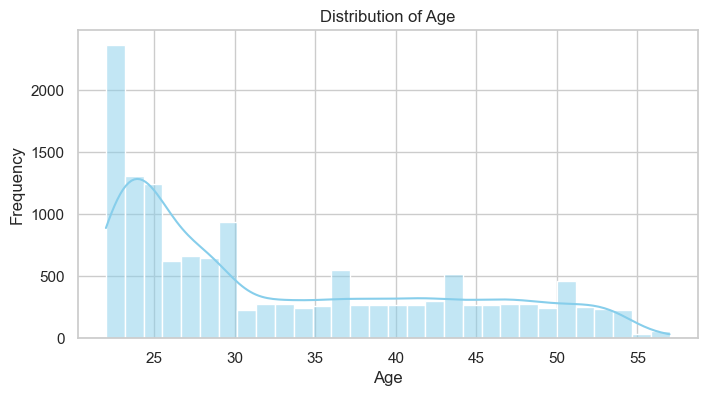

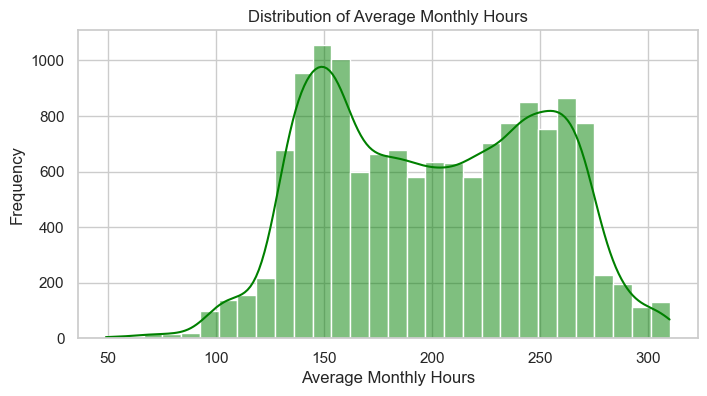

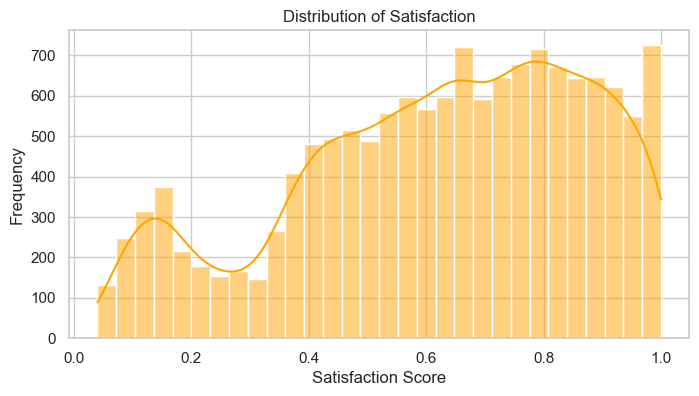

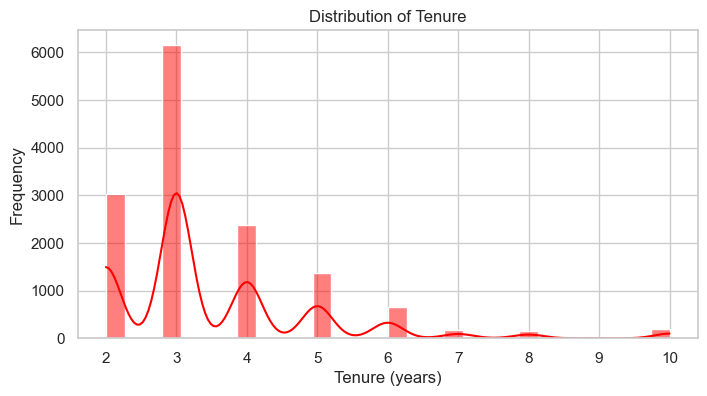

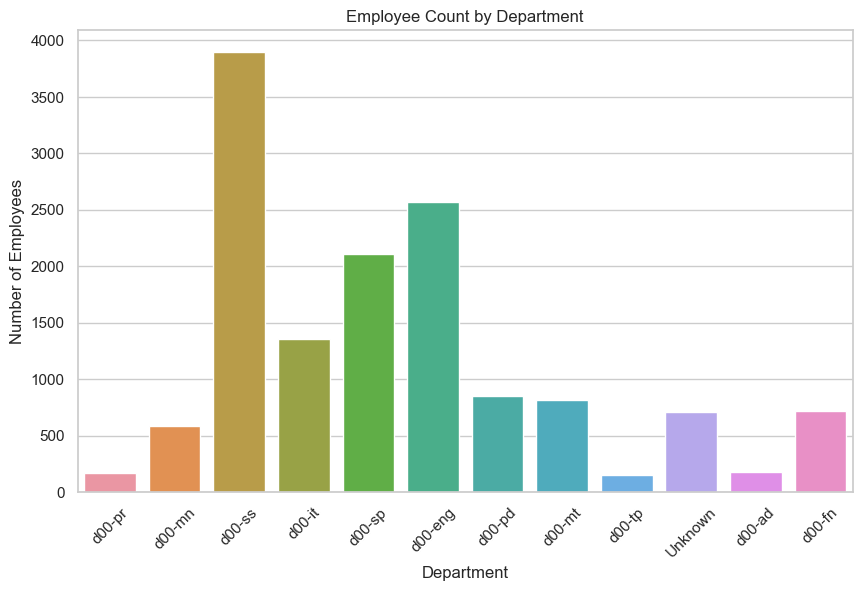

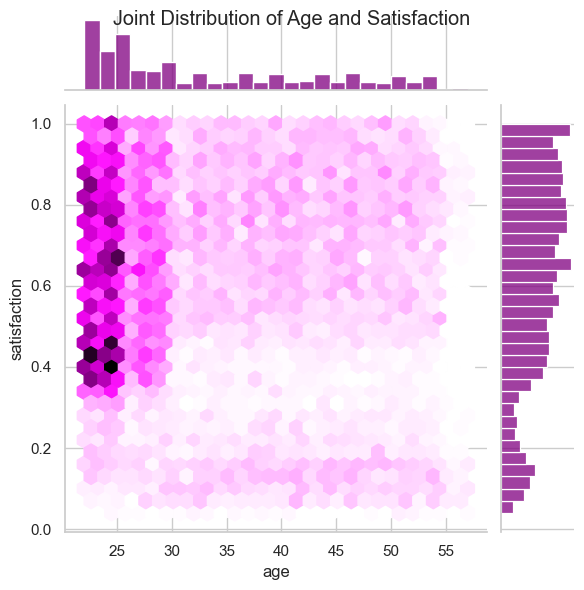

In [169]:
# Visualizing Data Distributions

# Setting the aesthetic style for better visual appeal
sns.set(style="whitegrid")

# Visualizing the distribution of 'age'
plt.figure(figsize=(8, 4))
sns.histplot(data=df_final, x='age', kde=True, color='skyblue', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of 'avg_monthly_hrs'
plt.figure(figsize=(8, 4))
sns.histplot(data=df_final, x='avg_monthly_hrs', kde=True, color='green', bins=30)
plt.title('Distribution of Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of 'satisfaction'
plt.figure(figsize=(8, 4))
sns.histplot(data=df_final, x='satisfaction', kde=True, color='orange', bins=30)
plt.title('Distribution of Satisfaction')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of 'tenure'
plt.figure(figsize=(8, 4))
sns.histplot(data=df_final, x='tenure', kde=True, color='red', bins=30)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (years)')
plt.ylabel('Frequency')
plt.show()

# Visualizing categorical data like 'department'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='department')
plt.title('Employee Count by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)  # Rotating the x labels for better readability
plt.show()

# Visualizing the relationship and distribution among two variables, 'age' vs 'satisfaction'
sns.jointplot(data=df_final, x='age', y='satisfaction', kind='hex', color='purple')
plt.suptitle('Joint Distribution of Age and Satisfaction', verticalalignment='top')
plt.show()


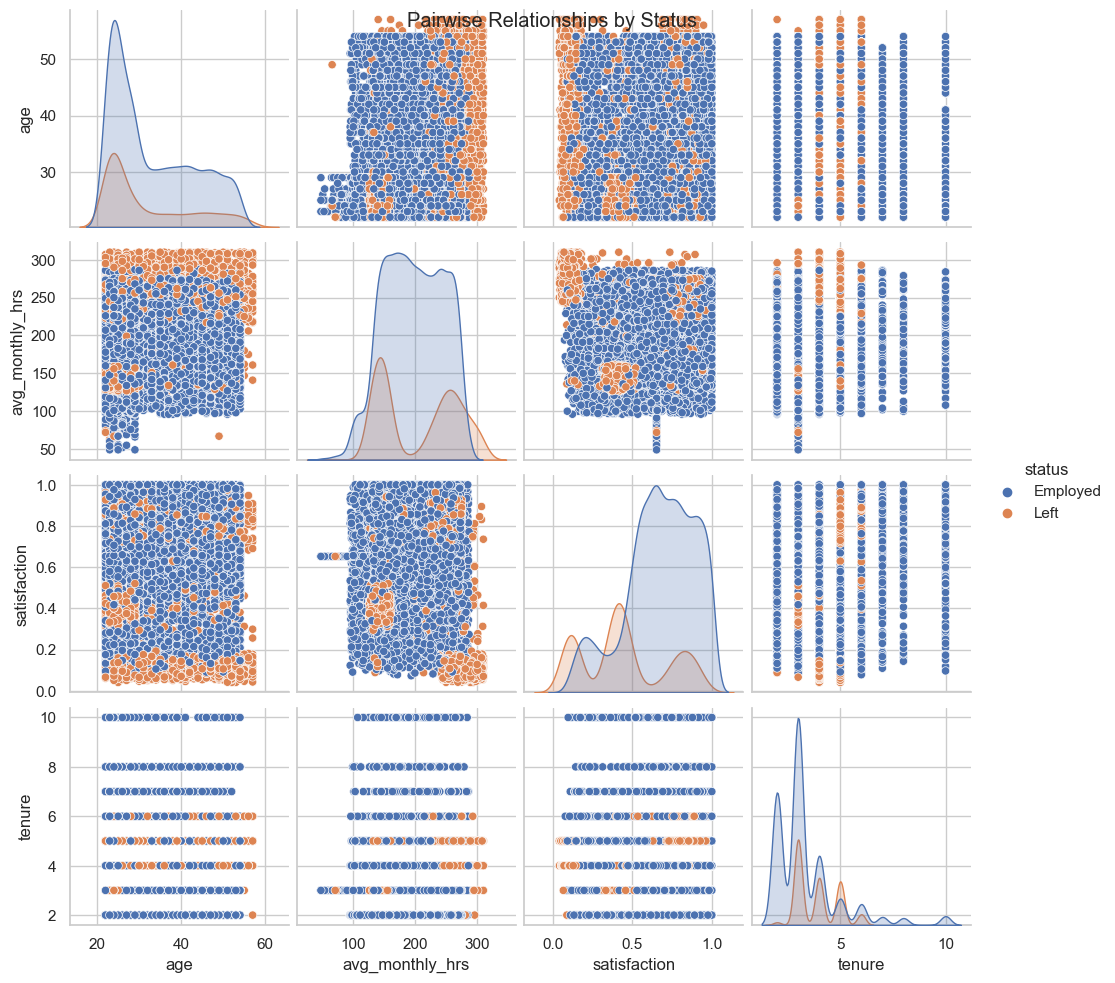

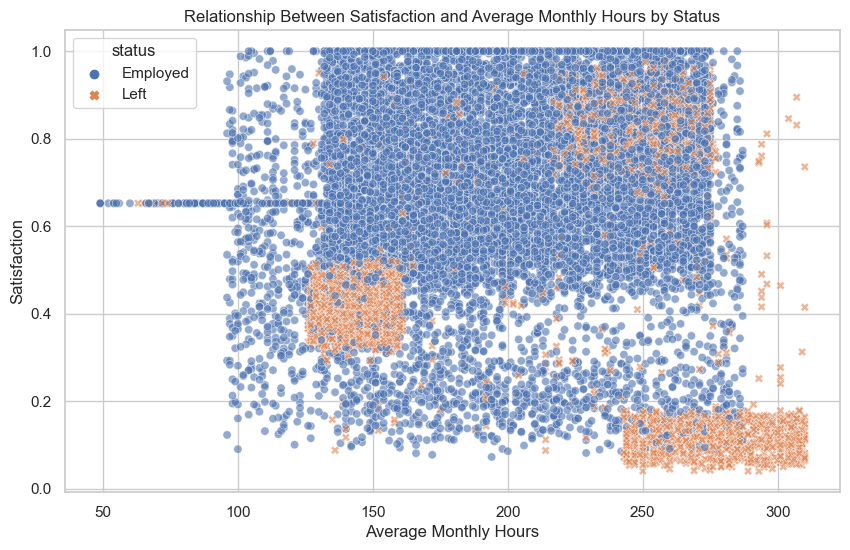

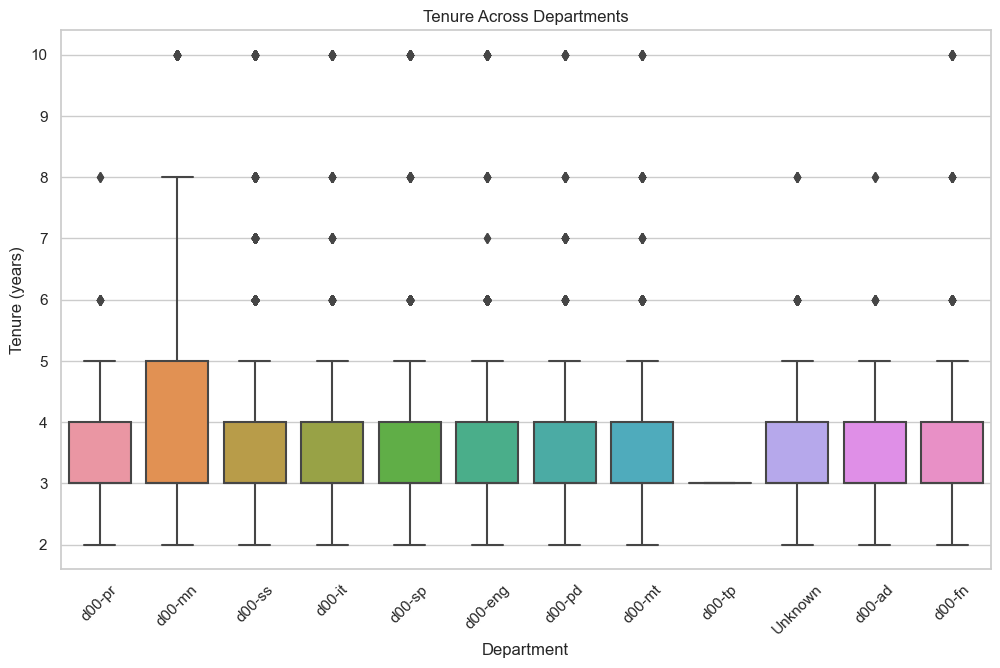

In [170]:
# Visualizing the correlation between numerical variables to quickly identify potential relationships or redundancies

# Pair plot for selected variables
sns.pairplot(df_final[['age', 'avg_monthly_hrs', 'satisfaction', 'tenure', 'status']], hue='status', diag_kind='kde')
plt.suptitle('Pairwise Relationships by Status')
plt.show()

# Scatter plot of satisfaction vs. average monthly hours colored by status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='avg_monthly_hrs', y='satisfaction', hue='status', style='status', alpha=0.6)
plt.title('Relationship Between Satisfaction and Average Monthly Hours by Status')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction')
plt.show()

# Boxplot of tenure by department
plt.figure(figsize=(12, 7))
sns.boxplot(x='department', y='tenure', data=df_final)
plt.title('Tenure Across Departments')
plt.xticks(rotation=45)
plt.xlabel('Department')
plt.ylabel('Tenure (years)')
plt.show()

In [171]:
# Conducting statistical tests to verify if the average satisfaction differs by gender.

import scipy.stats as stats

# T-test for satisfaction between genders
male_satisfaction = df_final[df_final['gender'] == 'Male']['satisfaction']
female_satisfaction = df_final[df_final['gender'] == 'Female']['satisfaction']

t_stat, p_val = stats.ttest_ind(male_satisfaction, female_satisfaction)
print("T-test for satisfaction between genders:")
print("T-Statistic:", t_stat)
print("P-value:", p_val)

T-test for satisfaction between genders:
T-Statistic: 4.198694786177067
P-value: 2.701038063377636e-05


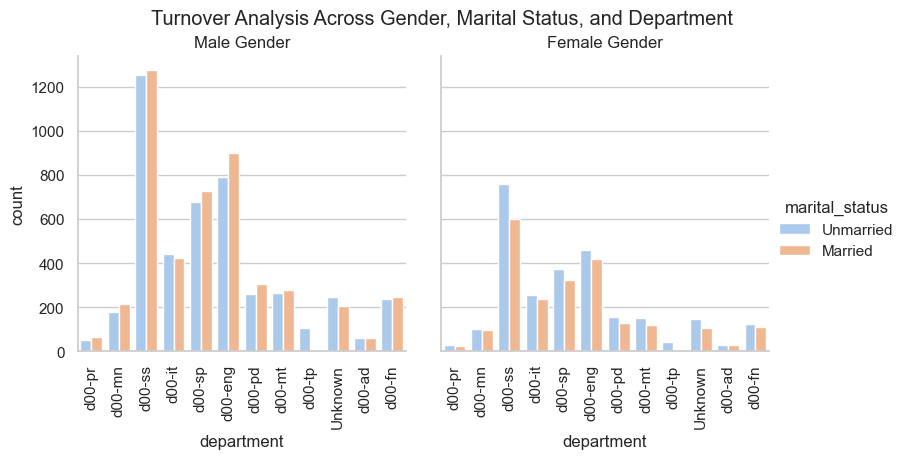

In [172]:
# Effects of Gender, Marital Status, and Department on Turnover

g = sns.catplot(x="department", hue="marital_status", col="gender", 
                data=df_final, kind="count", height=4, aspect=1, 
                col_wrap=2, palette="pastel", hue_order=['Unmarried', 'Married'])
g.set_xticklabels(rotation=90)
g.set_titles("{col_name} Gender")
g.fig.suptitle('Turnover Analysis Across Gender, Marital Status, and Department', y=1.02)
plt.show()

### **Key Observations and Insights from Performed EDA** ###

**Distribution of Age:**
The age distribution appears bimodal, with significant peaks around the early 20s and another smaller peak in the early 30s. This suggests the presence of two main age groups within the company, potentially indicating different career stages or generational cohorts.

**Distribution of Average Monthly Hours:**
The histogram shows a bimodal distribution of average monthly hours, with peaks around 150 and 250 hours. This could reflect distinct groups of part-time and full-time employees, or variations in workload that might correlate with job roles or departmental functions.

**Distribution of Satisfaction:**
Satisfaction scores are broadly distributed, with a notable peak around 0.7-0.8, indicating a generally high satisfaction level among many employees. However, the spread from low to high scores suggests varying degrees of contentment, which warrants deeper investigation into the factors influencing employee satisfaction.

**Distribution of Tenure:**
The distribution is somewhat staggered, with significant frequencies at specific tenure lengths, particularly at 3 and 5 years. The drop-offs at longer tenures might indicate typical points where employees leave the company, suggesting possible career lifecycle trends that could be important for understanding retention.

**Employee Count by Department:**
The departmental breakdown shows that certain departments, like d00-ss and d00-eng, have much higher employee counts than others, which may impact the dynamics of workload, satisfaction, and turnover rates within these larger departments.

**Joint Distribution of Age and Satisfaction:**
The joint distribution highlights a dense concentration of employees in their late 20s to early 30s with high satisfaction, whereas both younger and older age groups show more variability in satisfaction. This pattern could suggest that mid-career employees feel more settled and content compared to those who are newer to the workforce or nearing retirement.

**Pairwise Relationships by Status:**
The plots illustrate clear differences in how various factors like age, average monthly hours, satisfaction, and tenure distribute between employees who are employed and those who have left. Notably, satisfaction levels are lower among those who left, which is visually evident and correlates with higher average monthly hours and lower tenure.

**Relationship Between Satisfaction and Average Monthly Hours by Status:**
This scatter plot reveals a dense clustering of left employees at lower satisfaction levels across all ranges of monthly hours, indicating that dissatisfaction is a prevalent factor regardless of the workload. Additionally, those with extremely high monthly hours show significantly lower satisfaction, suggesting a potential area of intervention regarding work-life balance.

**Tenure Across Departments:**
The boxplot displays variance in tenure across different departments, with some departments showing a wider range of tenure than others. This could indicate varying levels of job satisfaction or career opportunities across departments.

**T-test for Satisfaction Between Genders:**
The significant T-statistic and the very small P-value (2.701e-05) from the T-test suggest there is a statistically significant difference in satisfaction between genders. This indicates that gender may play a role in how employees perceive their job satisfaction, which requires targeted strategies to ensure equitable work conditions and satisfaction across all gender groups

**Departmental Turnover Variations:**
Both charts for male and female employees show significant variations in turnover across departments. For instance, departments like d00-ss (Sales & Support) and d00-eng (Engineering) have notably higher turnover, especially among unmarried males. This could indicate specific stress factors or job dissatisfaction within these departments.

**Gender-Specific Turnover:**
The turnover seems generally higher among male employees in certain departments such as d00-ss and d00-eng. This might suggest different workplace experiences or expectations between genders in these roles.

**Impact of Marital Status:**
Turnover rates among unmarried employees are consistently higher across most departments, particularly noticeable in high-turnover departments. This might reflect different life stage priorities, where unmarried employees might be more open to changing jobs for better opportunities or personal growth.

**Married vs. Unmarried:**
Married employees tend to have lower turnover rates, which could be due to higher stability or different personal commitments compared to their unmarried counterparts. This trend holds true for both genders but is particularly pronounced in departments like d00-it (IT) and d00-eng (Engineering).

---
<a name = Section7></a>
# **7. Data Post-Processing**
---

The goal of data post-processing is to adjust and prepare the data by addressing any issues uncovered during the EDA and making final adjustments to improve the quality and effectiveness of the predictive models.

In [173]:
# Feature Engineering

# Creating an interaction term between satisfaction and average monthly hours
df_final['satisfaction_hours_interaction'] = df_final['satisfaction'] * df_final['avg_monthly_hrs']

# Another interaction term example between age and tenure to capture career stage effects
df_final['age_tenure_interaction'] = df_final['age'] * df_final['tenure']

In [174]:
# Encoding categorical variable
coded_data = pd.get_dummies(df_final, columns=['department', 'gender', 'marital_status'], drop_first=True)
salary_order = {'low': 1, 'medium': 2, 'high': 3}
coded_data['salary'] = df_final['salary'].map(salary_order)

# Converting 'status' to a numeric format
coded_data['status_numeric'] = coded_data['status'].map({'Left': 1, 'Employed': 0})
coded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14116 entries, 0 to 14115
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   employee_id                     14116 non-null  int64  
 1   age                             14116 non-null  int64  
 2   avg_monthly_hrs                 14116 non-null  float64
 3   filed_complaint                 14116 non-null  float64
 4   last_evaluation                 14116 non-null  float64
 5   n_projects                      14116 non-null  int64  
 6   recently_promoted               14116 non-null  float64
 7   salary                          14116 non-null  int64  
 8   satisfaction                    14116 non-null  float64
 9   status                          14116 non-null  object 
 10  tenure                          14116 non-null  float64
 11  dept_id                         14116 non-null  object 
 12  dept_name                       

In [175]:
# Preparing our feature matrix X and target vector y
X = coded_data.drop(['status_numeric', 'age','tenure','status', 'avg_monthly_hrs','employee_id', 
                     'dept_id', 'dept_name', 'dept_head','satisfaction'], axis=1)
y = coded_data['status_numeric']

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

In [176]:
# Displaying the final columns to be used in the feature matrix for Model Development and Evaluation
print("Features included in the model:")
print(X.columns)

Features included in the model:
Index(['filed_complaint', 'last_evaluation', 'n_projects', 'recently_promoted',
       'salary', 'satisfaction_hours_interaction', 'age_tenure_interaction',
       'department_d00-ad', 'department_d00-eng', 'department_d00-fn',
       'department_d00-it', 'department_d00-mn', 'department_d00-mt',
       'department_d00-pd', 'department_d00-pr', 'department_d00-sp',
       'department_d00-ss', 'department_d00-tp', 'gender_Male',
       'marital_status_Unmarried'],
      dtype='object')


In [177]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (11292, 20) (11292,)
Testing Data Shape: (2824, 20) (2824,)


In [178]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2167
           1       0.59      0.32      0.41       657

    accuracy                           0.79      2824
   macro avg       0.70      0.62      0.64      2824
weighted avg       0.77      0.79      0.76      2824



In [179]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2167
           1       0.94      0.87      0.90       657

    accuracy                           0.96      2824
   macro avg       0.95      0.93      0.94      2824
weighted avg       0.96      0.96      0.96      2824



In [181]:
# Grid Search to find the best parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Print best model parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best ROC-AUC score: ", grid_search.best_score_)

# Make predictions with the best model
predictions = best_rf.predict(X_test)
prob_predictions = best_rf.predict_proba(X_test)[:, 1]

# Evaluating the model
print("Classification Report on Test Set:\n",classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("ROC-AUC Score:", roc_auc_score(y_test,prob_predictions))

# Feature Importance
feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

Best parameters found:  {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC-AUC score:  0.9574920297555791
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2167
           1       0.94      0.87      0.90       657

    accuracy                           0.96      2824
   macro avg       0.95      0.93      0.94      2824
weighted avg       0.96      0.96      0.96      2824

Confusion Matrix:
 [[2132   35]
 [  86  571]]
ROC-AUC Score: 0.9790653914150194
                                importance
satisfaction_hours_interaction    0.320731
n_projects                        0.240364
age_tenure_interaction            0.158391
last_evaluation                   0.156442
marital_status_Unmarried          0.031495
salary                            0.018493
filed_complaint                   0.016975
gender_Male                       0.012130
department_d00-tp                 0.011428


In [182]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the base estimator
base_est = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost with the base estimator
ada_boost = AdaBoostClassifier(base_estimator=base_est, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [1, 2, 3]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=3, scoring='roc_auc')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best AdaBoost model
best_ada_boost = grid_search.best_estimator_

# Print best model parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best ROC-AUC score: ", grid_search.best_score_)

# Make predictions with the best model
predictions = best_ada_boost.predict(X_test)
prob_predictions = best_ada_boost.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report on Test Set:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("ROC-AUC Score on Test Set: ", roc_auc_score(y_test, prob_predictions))

# Feature Importance
feature_importances = pd.DataFrame(best_ada_boost.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

Best parameters found:  {'base_estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100}
Best ROC-AUC score:  0.973375245211869
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2167
           1       0.91      0.89      0.90       657

    accuracy                           0.95      2824
   macro avg       0.94      0.93      0.93      2824
weighted avg       0.95      0.95      0.95      2824

Confusion Matrix:
 [[2111   56]
 [  75  582]]
ROC-AUC Score on Test Set:  0.9716232627365371
                                importance
satisfaction_hours_interaction    0.237571
age_tenure_interaction            0.194432
n_projects                        0.174143
last_evaluation                   0.166379
marital_status_Unmarried          0.069204
salary                            0.041140
filed_complaint                   0.029753
department_d00-tp                 0.017820
gender_Male       

### **Model Comparison** ###

**RandomForest Model**

Performance Metrics:
ROC-AUC Score: 0.979
Accuracy: 96%
Precision (Class 1): 0.94
Recall (Class 1): 0.87
F1-Score (Class 1): 0.90

Feature Importance:
> Top features include satisfaction-hours interaction, number of projects, and age-tenure interaction, indicating that these features are highly predictive of turnover.

**AdaBoost Model**

Performance Metrics:
ROC-AUC Score: 0.972
Accuracy: 95%
Precision (Class 1): 0.91
Recall (Class 1): 0.89
F1-Score (Class 1): 0.90

Feature Importance:
> The importance is more evenly distributed among features, with significant contributions from the satisfaction-hours interaction, age-tenure interaction, and number of projects.

#### Evaluation and Selection Criteria ####

ROC-AUC Score:
> The RandomForest model has a slightly higher ROC-AUC score (0.979 vs. 0.972), suggesting it might be slightly better at distinguishing between the classes across all thresholds.

Precision and Recall:
> RandomForest has a higher precision for predicting employees who will leave, which means it is less likely to falsely label an employee as likely to leave. AdaBoost, however, has slightly better recall, indicating it is slightly better at catching all potential leavers.

Feature Importance:
> RandomForest seems to rely heavily on the top three features, which might make it more sensitive to changes in these areas. AdaBoost, while also highlighting similar top features, has a more balanced importance across other features, which might make it more robust to variations in less dominant features.

Model Complexity and Interpretability:
> RandomForest, with a higher complexity due to a larger number of trees and deeper trees, may be harder to interpret compared to AdaBoost, which inherently focuses on correcting errors in sequences and might provide simpler decision rules.

Decision for Deployment
> If the priority is to maximize the accuracy and ensure the highest possible discrimination between employees who will leave and those who will stay, RandomForest might be the better choice due to its higher ROC-AUC and precision.
> However, if the focus is on not missing any employees who might leave (higher recall) and ensuring the model is robust across various features, AdaBoost might be preferable.

***Since our main goal is to leverage historical employee data to predict potential resignations and develop model, will consider AdaBoost Model for prediction.***

In [217]:
# Test Data for predictions

# Load the unseen data
file_path = "E:\DATA SCIENCE\Datasets\Capstone Project 2\GCD_Capstone_Project_unseen_data - GCD_Capstone_Project_unseen_data.csv"
unseen_data = pd.read_csv(file_path)
unseen_data.head(10)

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0              134     D00-IT              NaN         0.528841           2   
1              221     D00-PD              NaN         0.784561           2   
2              156     D00-SS              NaN         0.545183           2   
3              133     D00-PR              NaN              NaN           4   
4              135     D00-SS              NaN         0.454637           2   
5              157     D00-FN              NaN         0.570767           4   
6              153     D00-MT              NaN         0.675263           2   
7              264     D00-PD              1.0              NaN           4   
8              179     D00-FN              NaN              NaN           5   
9              169     D00-MT              NaN         0.782310           3   

   recently_promoted  salary  satisfaction  tenure  employee_id  
0                NaN     low      0.400464     3.0       119045  
1                NaN     low      0.759513     3.0       112223  
2                NaN  medium      0.336457     3.0       103924  
3                NaN  medium      0.832039     2.0       105922  
4                NaN     low      0.320723     5.0       103297  
5                NaN     low      0.810483     3.0       115525  
6                NaN     low      0.611412     3.0       116409  
7                NaN     low      0.445556     2.0       109427  
8                NaN     low      0.534336     3.0       118590  
9                NaN     low      0.949086     3.0       107075

In [218]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [219]:
# Prepocessing the Test data similar to the Training data

for column in ['last_evaluation', 'satisfaction', 'tenure']:
    unseen_data[column].fillna(unseen_data[column].median(), inplace=True)


unseen_data['filed_complaint'].fillna(0, inplace=True)
unseen_data['recently_promoted'].fillna(0, inplace=True)

categorical_cols = ['department']
for col in categorical_cols:
    unseen_data[col].fillna('Unknown', inplace=True)

unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         100 non-null    object 
 2   filed_complaint    100 non-null    float64
 3   last_evaluation    100 non-null    float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  100 non-null    float64
 6   salary             100 non-null    object 
 7   satisfaction       100 non-null    float64
 8   tenure             100 non-null    float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [220]:
# Merging Dataframes
merged_unseen = pd.merge(unseen_data,df_emp_details,how="inner", on=['employee_id'])
merged_unseen.head(10)

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0              134     D00-IT              0.0         0.528841           2   
1              221     D00-PD              0.0         0.784561           2   
2              156     D00-SS              0.0         0.545183           2   
3              133     D00-PR              0.0         0.748131           4   
4              135     D00-SS              0.0         0.454637           2   
5              157     D00-FN              0.0         0.570767           4   
6              153     D00-MT              0.0         0.675263           2   
7              264     D00-PD              1.0         0.748131           4   
8              179     D00-FN              0.0         0.748131           5   
9              169     D00-MT              0.0         0.782310           3   

   recently_promoted  salary  satisfaction  tenure  employee_id  age  gender  \
0                0.0     low      0.400464     3.0       119045   27    Male   
1                0.0     low      0.759513     3.0       112223   23    Male   
2                0.0  medium      0.336457     3.0       103924   26    Male   
3                0.0  medium      0.832039     2.0       105922   52    Male   
4                0.0     low      0.320723     5.0       103297   27    Male   
5                0.0     low      0.810483     3.0       115525   47    Male   
6                0.0     low      0.611412     3.0       116409   24    Male   
7                0.0     low      0.445556     2.0       109427   31    Male   
8                0.0     low      0.534336     3.0       118590   46    Male   
9                0.0     low      0.949086     3.0       107075   23  Female   

  marital_status  
0      Unmarried  
1      Unmarried  
2      Unmarried  
3        Married  
4      Unmarried  
5        Married  
6      Unmarried  
7        Married  
8        Married  
9      Unmarried

In [221]:
# Transformation the Test data as per our Training Data

merged_unseen['satisfaction_hours_interaction'] = merged_unseen['satisfaction'] * merged_unseen['avg_monthly_hrs']
merged_unseen['age_tenure_interaction'] = merged_unseen['age'] * merged_unseen['tenure']

# Ensuring consistent department names across datasets
merged_unseen['department'] = merged_unseen['department'].str.lower().str.strip()

merged_unseen = pd.get_dummies(merged_unseen, columns=['department', 'gender', 'marital_status'], drop_first=True)
merged_unseen

avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
0               134              0.0         0.528841           2   
1               221              0.0         0.784561           2   
2               156              0.0         0.545183           2   
3               133              0.0         0.748131           4   
4               135              0.0         0.454637           2   
..              ...              ...              ...         ...   
95              261              0.0         0.748131           4   
96              231              1.0         0.663618           3   
97              162              1.0         0.509361           4   
98              209              0.0         0.565951           3   
99              189              0.0         0.949345           3   

    recently_promoted  salary  satisfaction  tenure  employee_id  age  ...  \
0                 0.0     low      0.400464     3.0       119045   27  ...   
1                 0.0     low      0.759513     3.0       112223   23  ...   
2                 0.0  medium      0.336457     3.0       103924   26  ...   
3                 0.0  medium      0.832039     2.0       105922   52  ...   
4                 0.0     low      0.320723     5.0       103297   27  ...   
..                ...     ...           ...     ...          ...  ...  ...   
95                0.0    high      0.762597     3.0       116666   22  ...   
96                0.0     low      0.660827     2.0       106422   24  ...   
97                0.0     low      0.885543     3.0       107889   42  ...   
98                0.0     low      0.601487     3.0       117622   26  ...   
99                0.0     low      0.856973     6.0       108058   22  ...   

    department_d00-mn  department_d00-mt  department_d00-pd  \
0               False              False              False   
1               False              False               True   
2               False              False              False   
3               False              False              False   
4               False              False              False   
..                ...                ...                ...   
95              False              False              False   
96              False              False               True   
97              False              False              False   
98              False              False              False   
99              False              False              False   

    department_d00-pr  department_d00-sp  department_d00-ss  \
0               False              False              False   
1               False              False              False   
2               False              False               True   
3                True              False              False   
4               False              False               True   
..                ...                ...                ...   
95              False              False               True   
96              False              False              False   
97              False              False              False   
98              False              False              False   
99              False              False              False   

    department_d00-tp  department_unknown  gender_Male  \
0               False               False         True   
1               False               False         True   
2               False               False         True   
3               False               False         True   
4               False               False         True   
..                ...                 ...          ...   
95              False               False         True   
96              False               False        False   
97              False               False         True   
98              False               False         True   
99              False               False        False   

    marital_status_Unmarrie

In [222]:
merged_unseen['salary'] = merged_unseen['salary'].map(salary_order)

merged_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   avg_monthly_hrs                 100 non-null    int64  
 1   filed_complaint                 100 non-null    float64
 2   last_evaluation                 100 non-null    float64
 3   n_projects                      100 non-null    int64  
 4   recently_promoted               100 non-null    float64
 5   salary                          100 non-null    int64  
 6   satisfaction                    100 non-null    float64
 7   tenure                          100 non-null    float64
 8   employee_id                     100 non-null    int64  
 9   age                             100 non-null    int64  
 10  satisfaction_hours_interaction  100 non-null    float64
 11  age_tenure_interaction          100 non-null    float64
 12  department_d00-ad               100 n

In [223]:
# Selecting features similar to the Training Dataset
features = merged_unseen[['filed_complaint', 'last_evaluation', 'n_projects', 'recently_promoted',
       'salary', 'satisfaction_hours_interaction', 'age_tenure_interaction',
       'department_d00-ad', 'department_d00-eng', 'department_d00-fn',
       'department_d00-it', 'department_d00-mn', 'department_d00-mt',
       'department_d00-pd', 'department_d00-pr', 'department_d00-sp',
       'department_d00-ss', 'department_d00-tp', 'gender_Male',
       'marital_status_Unmarried']]

In [230]:
#  Predict Probabilities

prob_predictions_test = best_ada_boost.predict_proba(features)[:, 1]  # get the probability of the class of interest
prob_predictions_test

array([0.58506663, 0.44106249, 0.57712255, 0.28898841, 0.5126579 ,
       0.38895814, 0.45176817, 0.32305346, 0.3935513 , 0.40324981,
       0.19268405, 0.56378533, 0.56848724, 0.36394169, 0.33551241,
       0.31634079, 0.5681792 , 0.16986626, 0.16673627, 0.34258747,
       0.56751838, 0.57693148, 0.46303145, 0.43423384, 0.51066513,
       0.40689459, 0.41649145, 0.34608652, 0.64542815, 0.12719379,
       0.38415033, 0.35895264, 0.31481721, 0.45653551, 0.38695302,
       0.38206334, 0.42390771, 0.59506515, 0.37677357, 0.42955819,
       0.57620235, 0.49468658, 0.33164097, 0.4251232 , 0.32656518,
       0.50450464, 0.5770842 , 0.21792055, 0.35172809, 0.44379824,
       0.35317125, 0.37969881, 0.41094584, 0.38274083, 0.48384318,
       0.33137074, 0.33792735, 0.40850711, 0.32174823, 0.64928082,
       0.3998077 , 0.56749424, 0.52360453, 0.40856218, 0.57269763,
       0.61744309, 0.3713063 , 0.55079906, 0.33026565, 0.60039086,
       0.46361498, 0.3042264 , 0.38617702, 0.43071215, 0.49573

In [225]:
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'Employee_ID': merged_unseen['employee_id'],
    'Prediction_Probability': prob_predictions_test
})

In [227]:
# Save to CSV without headers and indexes
submission_df.to_csv('E:/DATA SCIENCE/Datasets/Capstone Project 2/final_submission.csv', index=False, header=False)

In [228]:
# Create DataFrame
results_df = pd.DataFrame(submission_df)

# Apply threshold of 0.5 to make predictions
results_df['Threshold = 0.5'] = (results_df['Prediction_Probability'] >= 0.5).astype(int)

# Apply threshold of 0.7 to make predictions
results_df['Threshold = 0.7'] = (results_df['Prediction_Probability'] >= 0.7).astype(int)

# Display the DataFrame
print(results_df)

    Employee_ID  Prediction_Probability  Threshold = 0.5  Threshold = 0.7
0        119045                0.585067                1                0
1        112223                0.441062                0                0
2        103924                0.577123                1                0
3        105922                0.288988                0                0
4        103297                0.512658                1                0
..          ...                     ...              ...              ...
95       116666                0.363646                0                0
96       106422                0.160207                0                0
97       107889                0.277674                0                0
98       117622                0.403919                0                0
99       108058                0.477731                0                0

[100 rows x 4 columns]


**Explanation of Threshold Application**

Prediction Probabilities:

The column Prediction_Probability shows the likelihood (ranging from 0 to 1) that an employee will leave, as estimated by the predictive model. A higher value indicates a greater likelihood of the event occurring.

Threshold = 0.5:
Applying a threshold of 0.5 means that any probability equal to or greater than 0.5 results in a prediction of 1 (employee will leave), while probabilities below 0.5 result in a prediction of 0 (employee will stay). This is a standard practice in binary classification and provides a balanced approach between sensitivity and specificity.

Threshold = 0.7:
Setting a higher threshold of 0.7 increases the criteria for predicting an employee will leave. Here, only probabilities equal to or exceeding 0.7 yield a 1 prediction. This higher threshold reduces the likelihood of false positives (incorrectly predicting an employee will leave) but may increase false negatives (failing to identify an employee who will leave).

**Usefulness for Business Users**
> Risk Management: The choice of threshold is instrumental in managing risk. For instance, if the cost of erroneously predicting an employee will leave (false positive) is high (e.g., unnecessary expenditures in retention efforts), a higher threshold might be justified.

> Resource Allocation: By adjusting thresholds, HR departments can more accurately allocate resources to retention strategies targeted at those most likely to leave according to the model’s predictions.

> Decision Making: Different thresholds can be tested to determine which provides the best balance between capturing true leavers (true positives) and avoiding false alarms (false positives). This testing can be guided by business priorities, such as the desire to aggressively retain talent or to minimize intervention costs.

> Performance Evaluation: Varying the threshold and observing changes in outcomes like precision, recall, and overall accuracy helps in evaluating model performance under different operational scenarios. This evaluation is crucial for fine-tuning the model's deployment in real-world settings.

<a name = Section8></a>

---
# **9. Conclusion**
---

To ensure the most effective utilization of the insights gained from our extensive analysis, here are key recommendations tailored to enhance your organization's strategic HR initiatives and workforce management:

### **Strategic Recommendations** ###

**Proactive Retention Programs:**

> Focus on High-Risk Groups: Use the predictive model to identify departments or employee segments with higher turnover risks. Tailor retention programs specifically for these groups, considering their unique needs and stressors.

> Mentorship and Support Networks: Implement mentorship programs, especially for employees identified as at risk due to factors like workload or satisfaction levels. Encourage the development of support networks that promote a sense of belonging and community.

**Workload and Satisfaction Optimization:**

> Balanced Workload Distribution: Monitor workload metrics through the HR system and adjust assignments to prevent burnout. Use the insights from the model regarding average monthly hours and project counts to guide these adjustments.

> Job Satisfaction Enhancement: Regularly assess job satisfaction through surveys and informal feedback mechanisms. Address identified issues promptly, focusing on areas such as managerial support, resource availability, and recognition practices.

**Data-Driven Decision Making:**

>Integration of Analytics Tools: Embed analytics tools into daily HR operations to make data-driven decisions a norm rather than an exception. This integration helps in continuously monitoring workforce dynamics and preemptively addressing potential issues.

> Regular Model Updates and Training: Ensure that the predictive model is updated regularly with new data to maintain its accuracy. Additionally, invest in ongoing training for HR professionals to effectively use these tools and interpret the data.

**Career Development and Progression:**

> Transparent Career Pathways: Clearly outline career progression pathways within the organization. Use data from the model, like age and tenure interactions, to offer targeted development programs that align with individual career stages and aspirations.

> Skills Development Initiatives:Based on the model’s insights into project involvement and satisfaction scores, offer targeted skills development and training opportunities designed to increase job satisfaction and internal mobility.

**Customized Communication and Change Management:**

> Targeted Communication Strategies: Develop communication strategies that address the specific concerns and preferences of different employee groups, especially those identified as high risk for turnover.

> Change Management Practices: When implementing changes based on model insights, employ structured change management practices to ensure smooth transitions and maintain employee trust and morale.

**Enhanced Monitoring and Evaluation:**

> Continuous Monitoring: Utilize the model continuously to monitor the effectiveness of implemented strategies and make adjustments as needed. This approach allows for dynamic response to new challenges and opportunities as they arise.

> Impact Evaluation: Periodically evaluate the impact of retention strategies and HR interventions on reducing turnover and improving employee satisfaction, using metrics derived from the model.

**Stakeholder Engagement:**

> Engage Leadership: Ensure that leadership is engaged with and supports data-driven HR practices. Their support is crucial for the success of predictive analytics initiatives.
> Employee Involvement: Involve employees in the development and refinement of policies and programs that affect them. This involvement can increase acceptance and effectiveness of the strategies.

### **Conclusion** ###

*Implementing these recommendations will not only help in reducing turnover but also build a more engaged, satisfied, and productive workforce. Leveraging data-driven insights allows for targeted interventions, making HR practices more effective and aligned with the organization’s strategic goals. These efforts will ultimately foster a resilient organizational culture capable of adapting to both internal changes and external pressures.*